### Imports

In [31]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import os, gc

### Directories Paths

In [44]:
%pwd

'/home/javier/Documents/YelpRestaurantPhotoClassification/nbs'

In [81]:
dataset = 'food101'

In [82]:
LESSON_HOME_DIR = os.getcwd()
DATA_PATH = LESSON_HOME_DIR + '/../data/'
RESULTS_PATH = DATA_PATH + '/results/' + dataset + '/'
HISTORY_PATH = RESULTS_PATH + 'classifiers/history/'

### Get Results of Every Attribute and Fold

In [83]:
nb_attributes = 9
nb_folds = 4

In [84]:
acc = []
val_acc = []

loss = []
val_loss = []

h_pred = []
h_fc2 = []
history = {}

for attribute in range(nb_attributes):
    history['%d' % attribute] = dict()
    history['%d' % attribute]['acc'] = np.zeros(200)
    history['%d' % attribute]['val_acc'] = np.zeros(200)
    history['%d' % attribute]['loss'] = np.zeros(200)
    history['%d' % attribute]['val_loss'] = np.zeros(200)
    for fold in range(nb_folds):
        h_pred = np.load(HISTORY_PATH + 'history_prediction_attribute_%d_fold_%d.npy' % (attribute, fold))
        h_fc2 = np.load(HISTORY_PATH + 'history_fc2_attribute_%d_fold_%d.npy' % (attribute, fold))
        
        history['%d' % attribute]['acc'] += np.concatenate((np.array(h_pred.item()['acc']), np.array(h_fc2.item()['acc'])))
        history['%d' % attribute]['val_acc'] += np.concatenate((np.array(h_pred.item()['val_acc']), np.array(h_fc2.item()['val_acc'])))
        history['%d' % attribute]['loss'] += np.concatenate((np.array(h_pred.item()['loss']), np.array(h_fc2.item()['loss'])))
        history['%d' % attribute]['val_loss'] += np.concatenate((np.array(h_pred.item()['val_loss']), np.array(h_fc2.item()['val_loss'])))
  
    history['%d' % attribute]['acc'] /= 4
    history['%d' % attribute]['val_acc'] /= 4
    history['%d' % attribute]['loss'] /= 4
    history['%d' % attribute]['val_loss'] /= 4
        

In [85]:
import matplotlib
font = {'family' : 'normal',
        'size'   : 12}

matplotlib.rc('font', **font)

/home/javier/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


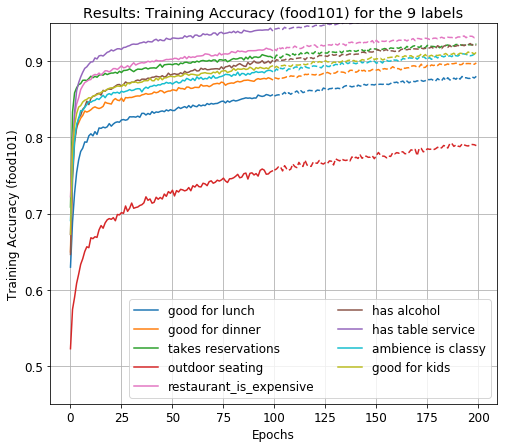

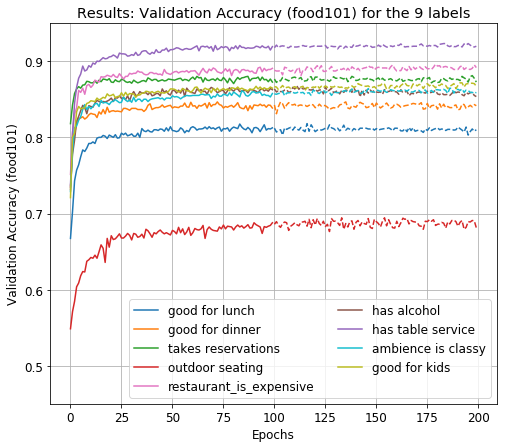

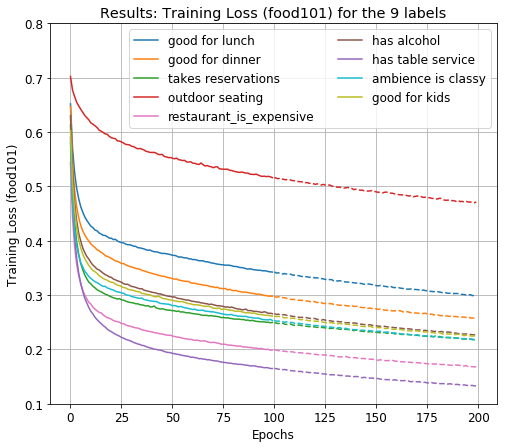

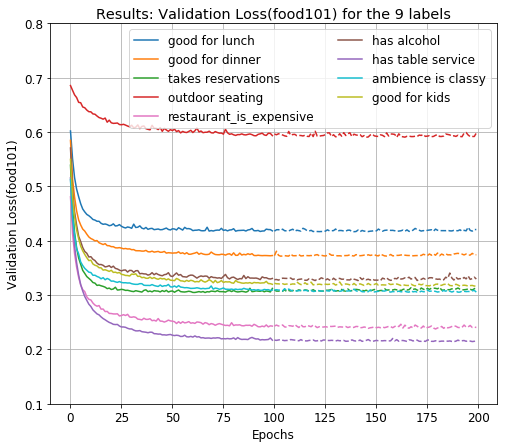

In [86]:
attribute_labels = ['good for lunch', 'good for dinner', 'takes reservations', 'outdoor seating', 'restaurant_is_expensive', 'has alcohol', 'has table service', 'ambience is classy', 'good for kids']
numeric_attributes = list(range(9))
colors_per_attribute = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:pink', 'tab:brown', 'tab:purple', 'tab:cyan', 'tab:olive']
metrics_keys = ['acc', 'val_acc', 'loss', 'val_loss']; metrics_titles = ['Training Accuracy (%s)' % dataset, 'Validation Accuracy (%s)' % dataset, 'Training Loss (%s)' % dataset, 'Validation Loss(%s)' % dataset]
epoch_stamp = 100

for metric_key, metric_title in zip(metrics_keys, metrics_titles):
    plt.figure(figsize=(8, 7))
    for numeric_attribute, color in zip(numeric_attributes, colors_per_attribute):
        plt.plot(list(range(0, epoch_stamp)), history[str(numeric_attribute)][metric_key][:epoch_stamp], c=color, linestyle='-', label=attribute_labels[numeric_attribute])
        plt.plot(list(range(epoch_stamp, 200)), history[str(numeric_attribute)][metric_key][epoch_stamp:], c=color, linestyle='--')
    plt.title('Results: ' + metric_title + ' for the 9 labels')
    plt.ylabel(metric_title)
    plt.xlabel('Epochs')
    if 'loss' not in metric_key:
        plt.ylim([0.45, 0.95])
    else:
        plt.ylim([0.10, 0.80])
    plt.legend(loc='best', ncol=2)
    plt.grid()
    

In [55]:
s = 'hola'

## Get the average validation accuracy for each attribute

In [9]:
mean_performance_imagenet = np.zeros(len(history))
for attribute, metric in history.items():
    idx = int(attribute)
    mean_performance_imagenet[idx] = np.mean(metric['val_acc'][-5:])
    

In [10]:
mean_performance_places

NameError: name 'mean_performance_places' is not defined

In [45]:
mean_performance_imagenet

array([ 0.80200401,  0.82735471,  0.87254509,  0.65490982,  0.8749499 ,
        0.84579158,  0.91863728,  0.86533066,  0.85901804])

In [55]:
places_win = np.where((mean_performance_places - mean_performance_imagenet) > 0)

In [57]:
places_win

(array([1, 3, 4, 5, 8]),)

In [63]:
for idx in places_win[0]:
    print(attribute_labels[int(idx)])

good for dinner
outdoor seating
restaurant_is_expensive
has alcohol
good for kids


In [56]:
(mean_performance_places - mean_performance_imagenet)[places_win]

array([ 0.00991984,  0.00320641,  0.00440882,  0.00260521,  0.0004008 ])

In [64]:
imagenet_win = np.where((mean_performance_imagenet - mean_performance_places) > 0)

In [67]:
for idx in imagenet_win[0]:
    print(attribute_labels[int(idx)])

good for lunch
takes reservations
has table service
ambience is classy


In [66]:
(mean_performance_imagenet - mean_performance_places)[imagenet_win]

array([ 0.00521042,  0.00330661,  0.0246493 ,  0.01112224])